<a href="https://colab.research.google.com/github/GoryninLA/my_works_prog/blob/main/lab_02.01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

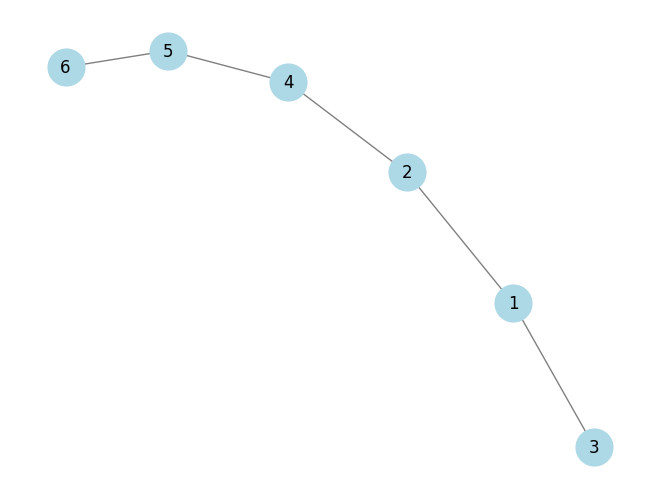

Матрица смежности:
[0, 1, 1, 0, 0, 0]
[1, 0, 0, 1, 0, 0]
[1, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 1, 0]

Матрица инцидентности:
[1, 1, 0, 0, 0]
[1, 0, 1, 0, 0]
[0, 1, 0, 0, 0]
[0, 0, 1, 1, 0]
[0, 0, 0, 1, 1]
[0, 0, 0, 0, 1]

Компоненты связности графа:
Компонента 1: [1, 2, 4, 5, 6, 3]


In [22]:
# Вариант 5.
# 1. Построить граф из 6 вершин и ребер: (1,2), (1,3), (2,4), (4,5), (5,6).
# 2. Построить матрицу смежности и матрицу инцидентности.
# 3. Найти компоненты связности.

# 1
import networkx as nx
import matplotlib.pyplot as plt

edges = [(1,2), (1,3), (2,4), (4,5), (5,6)]

G = nx.Graph()

G.add_edges_from(edges)

nx.draw(G, with_labels=True, node_color='lightblue', node_size=700, edge_color='gray')
plt.show()


# 2
def create_adjacency_matrix(edges, num_vertices):
  adjacency_matrix = [[0 for _ in range(num_vertices)] for _ in range(num_vertices)]
  for edge in edges:
    u, v = edge
    adjacency_matrix[u - 1][v - 1] = 1
    adjacency_matrix[v - 1][u - 1] = 1
  return adjacency_matrix

edges = [(1,2), (1,3), (2,4), (4,5), (5,6)]
num_vertices = 6
adjacency_matrix = create_adjacency_matrix(edges, num_vertices)

print("Матрица смежности:")
for row in adjacency_matrix:
  print(row)


def create_incidence_matrix(edges, num_vertices):
  num_edges = len(edges)
  incidence_matrix = [[0 for _ in range(num_edges)] for _ in range(num_vertices)]
  for edge_index, edge in enumerate(edges):
    u, v = edge
    incidence_matrix[u - 1][edge_index] = 1
    incidence_matrix[v - 1][edge_index] = 1
  return incidence_matrix

incidence_matrix = create_incidence_matrix(edges, num_vertices)

print("\nМатрица инцидентности:")
for row in incidence_matrix:
  print(row)


# 3
def find_connected_components(adjacency_matrix):
  num_vertices = len(adjacency_matrix)
  visited = [False] * num_vertices
  components = []
  def dfs(vertex, current_component):
    visited[vertex] = True
    current_component.append(vertex + 1)
    for neighbor, is_connected in enumerate(adjacency_matrix[vertex]):
      if is_connected and not visited[neighbor]:
        dfs(neighbor, current_component)

  for vertex in range(num_vertices):
    if not visited[vertex]:
      current_component = []
      dfs(vertex, current_component)
      components.append(current_component)

  return components

connected_components = find_connected_components(adjacency_matrix)

print("\nКомпоненты связности графа:")
for i, component in enumerate(connected_components, start=1):
  print(f"Компонента {i}: {component}")